# 一、标准SC译码

## 1. 准备工作

经过之前的讲解，我们现在应该已经大概建立起关于极化码的印象，那就是它们是一类建立在二元极化核：

$$\mathbf{G}_2=\begin{pmatrix}1&0\\1&1\end{pmatrix}$$

的递归操作之上的码。它们是线性码但并不是代数码，只有在SC译码（及其变体）下，才具有理论最优性。而SC译码具有特殊的顺序，为了建立对其原理的基本认知，本小节将介绍在极化码基本单元上的两个关键的推理问题，之前介绍的最小和SC译码算法的公式的正确性也能得到解释。

> 我们将使用大写字母表示**随机变量**（Random Variable），小写字母表示该随机变量的**实现**（Realization）。前者是一种数学上的抽象概念，而后者则是它在每次实验中对外表现出的具体状态。

### 1.1 两个关键问题

![码长为2的极化码](../01_Introduction/figures/len2.png)

上图展示了码长为2的极化码，其中随机变量$X_1,X_2$与随机变量$U_1,U_2$之间存在确定映射$\mathbf{G}_2$，与随机变量$Y_1,Y_2$之间存在随机映射$W$。考虑到码长为2的极化码实际上是任意码长极化码的基本单元，为了能够讨论更一般性的问题，我们对这个结构进行更一般化的阐释：

![二元极化核](./figures/generalized.jpg)

如上图所示，在最经典的场景下$U_1,U_2$是独立同均匀分布的二进制随机变量，后续的$X_1,X_2$以及$Y_1,Y_2$都是由它们生成的，并且映射关系也都是已知的。在这个结构中，Arikan重点关注了如下两个问题：
1. 已知$Y_1,Y_2=y_1,y_2$，求随机变量$U_1$的条件概率分布；
2. 已知$Y_1,Y_2,U_1=y_1,y_2,u_1$，求随机变量$U_2$的条件概率分布。

### 1.2 Arikan的第一个译码函数

我们首先尝试解决第一个问题，其推理过程如下所示：

![第一个问题](./figures/problem1.jpg)

1. 要计算$U_1$的条件概率分布，根据$U_1=X_1+X_2$首先应当分别计算$X_1$和$X_2$的条件概率分布；
2. $X_1$的条件概率分布可以通过$Y_1=y_1$计算得到；
3. $X_2$的条件概率分布包括两部分，第一部分根据$U_2$得到，第二部分根据$Y_2=y_2$得到。

具体来说，我们知道$U_2$服从均匀分布，因此$X_2$的条件概率分布直接由$Y_2=y_2$得到。设$X$和$Y$之间通过概率为$p$的比特翻转信道进行映射，那么$\Pr(X_2=y_2)=1-p,\Pr(X_2=y_2+1)=p$。同理当$Y_1=y_1$时$\Pr(X_1=y_1)=1-p,\Pr(X_1=y_1+1)=p$，代入上述推理过程得到：

$$\Pr(U_1=y_1+y_2)=(1-p)^2+p^2,\Pr(U_1=y_1+y_2+1)=2(1-p)p$$

> 为叙述简单起见未列出条件部分，请注意区分！

目前这个形式看起来是比较混乱的，可以将原问题进行一个简单变形：已知$X_1,X_2$的似然比分别为$L^X_1,L^X_2$，求$U_1$的似然比。首先我们将似然比转化回相应的概率分布。根据定义$L=\log{\frac{P_0}{P_1}}$以及$P_0+P_1=1$，有$L=\log{\frac{P_0}{1-P_0}}$；将左右两边取负号得$-L=\log{\frac{1-P_0}{P_0}}$；两边取指数有$e^{-L}=\frac{1}{P_0}-1$；进一步整理可得：

$$P_0=\frac{e^L}{1+e^L},P_1=\frac{1}{1+e^L}$$

于是：

$$\Pr(U_1=0)=\left(\frac{e^{L^X_1}}{1+e^{L^X_1}}\right)\left(\frac{e^{L^X_2}}{1+e^{L^X_2}}\right)+\left(\frac{1}{1+e^{L^X_1}}\right)\left(\frac{1}{1+e^{L^X_2}}\right)$$

以及：

$$\Pr(U_1=1)=\left(\frac{e^{L^X_1}}{1+e^{L^X_1}}\right)\left(\frac{1}{1+e^{L^X_2}}\right)+\left(\frac{1}{1+e^{L^X_1}}\right)\left(\frac{e^{L^X_2}}{1+e^{L^X_2}}\right)$$

因此$U_1$的对数似然比为：

$$L^U_1=\log{\frac{1+e^{L^X_1+L^X_2}}{e^{L^X_1}+e^{L^X_2}}}$$

其实到这里就已经可以了，但人们在之前关于LDPC的研究中发现，这个式子还可以做一个有趣的变形。利用：

$$\tanh\left(\frac{x}{2}\right)=\frac{e^x-1}{e^x+1}$$

有：

$$\tanh\left(\frac{L^U_1}{2}\right)=\frac{\frac{1+e^{L^X_1+L^X_2}}{e^{L^X_1}+e^{L^X_2}}-1}{\frac{1+e^{L^X_1+L^X_2}}{e^{L^X_1}+e^{L^X_2}}+1}=\frac{1+e^{L^X_1+L^X_2}-e^{L^X_1}-e^{L^X_2}}{1+e^{L^X_1+L^X_2}+e^{L^X_1}+e^{L^X_2}}=\frac{(e^{L^X_1}-1)(e^{L^X_2}-1)}{(e^{L^X_1}+1)(e^{L^X_2}+1)}=\tanh\left(\frac{L^X_1}{2}\right)\tanh\left(\frac{L^X_2}{2}\right)$$

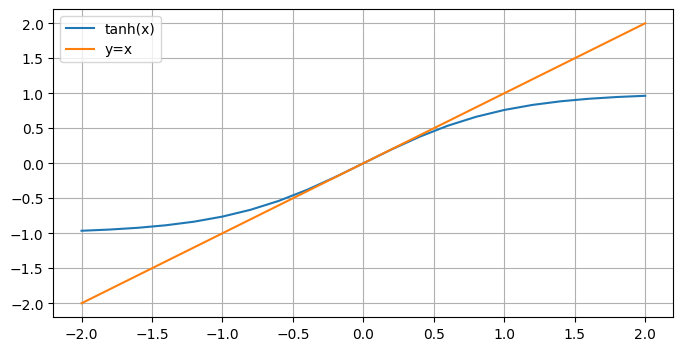

In [1]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-2, 2, 21)
plt.figure(figsize=(8, 4))
plt.plot(x, np.tanh(x), label="tanh(x)")
plt.plot(x, x, label="y=x")
plt.grid()
plt.legend()
plt.show()

从上图可以看出，$\tanh(\cdot)$是奇函数，并且在$x$的绝对值较小时有$\tanh(x)\approx x$，在$x$的绝对值较大时有$|\tanh(x)| \approx 1$，这解释了为什么在之前的最小和译码算法中可以使用：

$$L^U_1 = \text{sign}(L^X_1) \times \text{sign}(L^X_2) \times \min \left\{|L^X_1|, |L^X_2|\right\}$$

来近似计算：

$$L^U_1 = 2\cdot\tanh^{-1}(\tanh(L^X_1/2)\cdot\tanh(L^X_2/2))$$

### 1.3 Arikan的第二个译码函数

接下来我们求解第二个问题，其推理过程如图所示：

![第一个问题](./figures/problem2.jpg)

1. 要计算$U_2$的条件概率分布，根据$U_2=X_2$首先应当计算$X_2$的条件概率分布；
2. $X_2$的条件概率分布包括两部分，第一部分根据$X_2=X_1-U_1$得到，第二部分根据$Y_2=y_2$得到；
3. $U_1$的值已知，$X_1$的条件概率分布可以通过$Y_1=y_1$得到。

对于$u_1=0$而言，二元组$(U_1,X_2)$的条件概率分布为$\Pr((U_1,X_2)=(0,y_1))=1-p,\Pr((U_1,X_2)=(0,y_1+1))=p$。为方便起见、也为了和第一个译码函数形式统一，我们定义这个二元组关于$X_1$的对数似然比为$L^X_1$，从$Y_2$了解到的关于$X_2$的对数似然比为$L^X_2$，那么不难知道$L^U_2=L^X_1 + L^X_2$。对于$u_1=1$而言，同理不难得到$L^U_2=-L^X_1 + L^X_2$。这两类情况可以统一表示为：

$$L^U_2=(1-2u_1)\cdot L^X_1 + L^X_2$$

> 推荐阅读：Bayes推理问题与[置信度传播算法](http://www.vision.jhu.edu/reading_group/TR2001-22.pdf)。纠错码领域经典的迭代式BP译码算法是对它们的近似实现。

### 1.4 非二进制推理问题

Arikan的经典译码算法是基于二进制输入信道的，尽管在实际的通信系统中很少使用非二进制纠错码，但如果是出于理论研究的目的，极化码对非二进制场景也是具有最优性的，不过需要使用特殊的极化矩阵，否则不一定会发生信道极化，或者信道只会出现“部分极化”。

> 实际通信系统会通过Gray编码建立二进制比特和非二进制符号之间的映射

非二进制场景下的推导过程几乎完全一致，因为推理结构是不变的：

![二元极化核](./figures/generalized.jpg)

两个关键问题仍然是：
1. 已知$Y_1,Y_2=y_1,y_2$，求随机变量$U_1$的条件概率分布；
2. 已知$Y_1,Y_2,U_1=y_1,y_2,u_1$，求随机变量$U_2$的条件概率分布。

或者我们经过上一小节的推导，知道直接使用$y_1,y_2$表示计算结果会导致形式复杂，建议进行如下变形：
1. 已知$X_1,X_2$的条件概率分布，求随机变量$U_1$的条件概率分布；
2. 已知$X_1,X_2$的条件概率分布和$U_1$的取值，求随机变量$U_2$的条件概率分布。

唯一区别在于无法像对数似然比一样，只使用一个数就充分地表示一个概率分布，而只能将相应的随机变量取每个值的概率都列出来，构成一个概率分布序列，相应的计算过程也从实数运算变成了序列运算。我们不再赘述具体的计算过程，直接给出结果：

设随机变量取值于$\{0,\ldots,q-1\}$，所有关于随机变量及其取值的运算均模$q$，记$X_1$和$X_2$的条件概率分布序列分别为$\mathcal{P}^{X_1}_{0:q-1}$和$\mathcal{P}^{X_2}_{0:q-1}$，那么$U_1$对应的概率分布序列$\mathcal{P}^{U_1}_{0:q-1}$中每个元素的计算公式为：

$$\mathcal{P}^{U_1}_k=\sum_{i=0}^{q-1}\mathcal{P}^{X_1}_{k+i}\cdot\mathcal{P}^{X_2}_i$$

在已知$U_1=u_1$的情况下，$U_2$对应的概率分布序列$\mathcal{P}^{U_2}_{0:q-1}$中每个元素的计算公式为：

$$\mathcal{P}^{U_2}_k=\frac{\mathcal{P}^{X_1}_{u_1+k}\cdot\mathcal{P}^{X_2}_k}{\sum_{i=0}^{q-1}\mathcal{P}^{X_1}_{u_1+i}\cdot\mathcal{P}^{X_2}_i}$$

上面这两个式子同样适用于$q=2$的二进制情况，感兴趣的读者可以代入自行验证。

> 这两个式子本质上分别是循环卷积和Hadamard积。

---

## 2. 连续消除译码方案

在上文中，我们介绍了二元极化核上的Bayes推理问题以及它们的解法。作为SC译码算法的基本单元，它们是我们建立对极化码更深层次认知的关键，请务必掌握、透彻理解。接下来，我们将以它们为基础，给出Arikan的标准SC译码算法。

### 2.1 极化信道

对于一个码长为$N=2^n$的极化码，设$X_{1:N}=U_{1:N}\cdot\mathbf{G}_N\cdot\mathbf{B}_N$，其中$\mathbf{B}_N$是尺寸为$N$的比特反转置换矩阵。随机序列$X_{1:N}$经过随机映射得到一个新的随机序列$Y_{1:N}$（实际上就是经过$N$个简单信道进行传输）。Arikan考虑的是如下问题：

**已知$Y_{1:N}=y_{1:N}$，以及$U_{1:i-1}=u_{1:i-1}$的情况下，求随机变量$U_i$的条件概率分布。**

从数学上来讲，任意两个（或两组）随机变量之间的条件概率分布，都可以被视作一个信道。因此，我们可以考虑这样一个特殊的信道：

$$W^{(i)}_N(Y_{1:N},U_{1:i-1}|U_i)$$

它以随机变量$U_i$为输入、以随机变量$Y_{1:N},U_{1:i-1}$为输出。那么Arikan考虑的问题就是，在已知该信道的输出端具体取值的情况下，其可能的输入情况是什么？

> 我们称这些信道为：**极化信道**。

Arikan在他的工作中证明了，随着码长$N\to+\infty$，这$N$个极化信道的容量$I(Y_{1:N},U_{1:i-1};U_i)$要么接近$1$要么接近$0$，也即所谓的极化。这个现象将在下一节深入讨论，在本小节我们所需要关注的是如何求这些信道的转移概率。

### 2.2 译码二叉树

对于第$i$个极化信道$W^{(i)}_N(Y_{1:N},U_{1:i-1}|U_i)$而言，直接求其转移概率矩阵是不可能的，因为这个矩阵形状为$2\times 2^{N+i-1}$，所有可能的输出情况数随码长$N$和索引$i$指数级增长。尽管无法求出其所有列，但我们可以准确地求出指定的某一列，这可以通过对极化变换$\mathbf{G}_N$进行Bayes推理得到，所采用的算法是置信度传播算法，其计算复杂度为$\mathcal{O}(N\log{N})$。

根据极化码的递归结构，我们可以从右到左，将第$i$层中间变量拆分为$2^i$个大小为$N/2^i$的树节点，从而构成一颗二叉树，如下图所示：

![极化二叉树](./figures/polar_tree.jpg)

上一小节介绍的两个推理问题，实际上就是子树上的两个推理问题，其树状推理图如下所示，相应的计算方法均已给出（注意二叉树的左子节点指的是靠上的那个小节点，二叉树的右子节点指的是靠下的那个小节点）：

![二叉树上的推理](./figures/tree_inference.jpg)

以$N=4,i=3$为例，条件概率分布$\Pr(U_3|Y_{1:4}=y_{1:4},U_{1:2}=u_{1:2})$的推理图为：

![推理示例图](./figures/some_inference.jpg)

按照这种二叉树表示法，可以很方便地计算任意条件概率分布。

### 2.3 连续消除规则

回到极化码的译码问题中来，接收端的任务是根据信道输出结果$Y_{1:N}=y_{1:N}$，对随机变量$U_{1:N}$的取值进行估计。Arikan提出了一种简单直接的做法，就是串行地从$i=1$到$N$，依次计算条件概率分布：

$$\Pr(U_i|Y_{1:N}=y_{1:N},U_{1:i-1}=\hat{u}_{1:i-1})$$

若是冻结比特，则直接获取已知的值$\hat{u}_i\gets 0$；若不是冻结比特，则执行最大似然判决：

$$\hat{u}_i \gets \mathop{\arg\max}\limits_{k}\Pr(U_i|Y_{1:N}=y_{1:N},U_{1:i-1}=\hat{u}_{1:i-1})$$

回顾之前的最小和SC译码章节，其中介绍到，递归译码过程有一点类似于**二叉树的左序遍历**。实际上，该特殊的译码顺序，就来源于这里介绍的从$i=1$到$N$串行计算各概率分布的过程。

> 注意条件部分是估计值$\hat{u}$而不是真实值$u$，这是因为真实值对译码器而言是不可见的。

### 2.4 算法复杂度

注意到，如果单独考虑每一次的运算，复杂度为$\mathcal{O}(N\log{N})$；该操作要执行$N$次，因此总复杂度为$\mathcal{O}(N^2\log{N})$。但实际上由于计算是从$i=1$串行地执行到$N$的，在相邻两步之间存在一些可以共享的信息。下图表示$N=4,i=1\to 4$的SC译码过程，相邻两步之间可以共享的信息使用黑线标注，需要重新计算的信息使用蓝色线标注：

![SC译码的优化](./figures/complexity.jpg)

不难注意到每一条有向边最多更新三次，因此总运算复杂度仍为$\mathcal{O}(N\log{N})$。

关于算法的空间复杂度，一般来讲我们认为是$\mathcal{O}(N\log{N})$，不过如果加以深度优化、剔除掉后续译码中再也用不到的信息，空间复杂度可以降低至$\mathcal{O}(N)$。